this notebook loops through the code from "DI_challenge1_asset1" for all products in the database and produces a plot

In [1]:
#load all the important stuff
import difflib
import numpy as np
import pandas as pd
from difflib import SequenceMatcher

from IPython.display import Image
import requests
import IPython.display as Disp

import matplotlib.pyplot as plt

#load product database
product_file='ulta.csv'
product_db=pd.read_csv(product_file)

#combine brand + product name
brand_plus_name=[str(product_db['brand'].loc[i])+' '+str(product_db['name'].loc[i]) for i in range(0,len(product_db))]
product_db['name']=brand_plus_name

In [2]:
def find_matches(indexA,nameA):
    #find 3 most similar products, based on ingredients

    #format ingredients list
    try:
        listA = product_db['ingredients'].loc[indexA].split(', ')
    except:
        listA=['invalidA']

    listA=[ingr.lower() for ingr in listA]

    num_shared=[]

    #print 'searching for products similar to {}...\n'.format(nameA)

    for i in range(0,len(product_db)):
        nameB=name_list[i]

        #format ingredients list
        try:
            listB = product_db['ingredients'].loc[i].split(', ')
        except:
            listB=['invalidB']

        listB=[ingr.lower() for ingr in listB]

        shared=(set(listA) & set(listB))
        if(nameA!=nameB):
            num_shared.append(len(shared))
        else:
            num_shared.append(0)

    num_shared=np.asarray(num_shared)

    return_list=[0,0,0]
    #if matches exist
    if(sum(num_shared)>0):
        match_indices=[]
        shared_ingredients=[]
        for i in [0,1,2]: #get top 3 matches
            if(sum(num_shared)>0):
                #find (next) max value
                max_index=np.where(num_shared==max(num_shared))[0][0]
                match_indices.append(max_index)
                shared_ingredients.append(max(num_shared))
                #remove max value
                num_shared=np.delete(num_shared,max_index)

        #print 'top match(es):\n'
        for i in range(0,len(match_indices)):
            index=match_indices[i]
            #print '{} ({})'.format(name_list[index],product_db['price'].loc[index])
            #print '{} shared ingredients\n'.format(shared_ingredients[i])
            return_list[i]=float(shared_ingredients[i])/float(len(listA))*100.

    return return_list

In [3]:
name_list=[str(product_db['name'].loc[i]).lower() for i in range(0,len(product_db))]

hist_list=[]
for i in range(0,len(product_db)):
    nameA=name_list[i]
    indexA=i
    returned=find_matches(indexA,nameA)
    hist_list.append(max(returned))

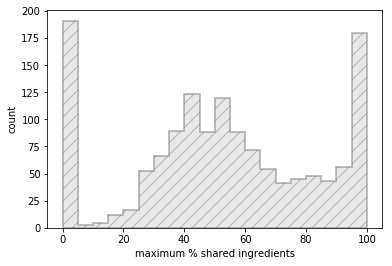

In [4]:
bin_range = np.arange(0,105,5)
plt.hist(hist_list,bin_range,lw=2,facecolor='lightgray',edgecolor='gray',hatch='//',histtype='stepfilled',alpha=0.5)
plt.xlabel('maximum % shared ingredients')
plt.ylabel('count')
plt.show()

This histogram displays information on match results for all products in the database.

For each (up to 3) product recommended to the user based on their input product, I calculate what percentage of the input product's ingredients list is found in each recommended product, and include the maximum percentage in the above plot.

Note that some of the products in the "0%" bin have null ingredients list, and some of the products in the "100%" bin have false matches because they appeared on the scraped website more than once.

It appears that for the majority of attempted matches, a user can find a "best match" that shares >50% of the input product's ingredients. This result will improve with more sophisticated ingredient comparison techniques, as it's likely that many products share common ingredients under varying names.